In [8]:
import pandas as pd

In [15]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
iris_data = pd.read_csv(url,names = names)

In [16]:
iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [18]:
print(iris_data.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


In [20]:
import matplotlib
from matplotlib import pyplot as plt

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EE88A1B470>,
      dtype=object)

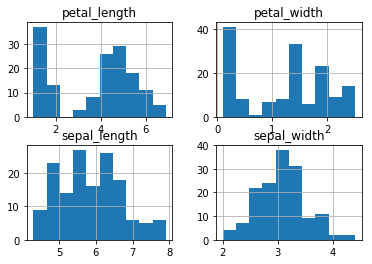

In [21]:
iris_data.hist()

In [22]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EE88E53C88>,
      dtype=object)

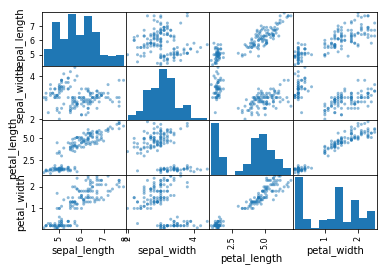

In [24]:
scatter_matrix(iris_data,diagonal='hist')
#default value of diagonal is 'hist' you can set it as 'kde'


In [35]:
import sklearn
from sklearn import model_selection
validation_size = 0.20
seed = 7
x = iris_data.values[:,0:4]
y = iris_data.values[:,4]
x_train,x_validation,y_train,y_validation = model_selection.train_test_split(x,y,test_size=validation_size,random_state=seed)

In [36]:
seed = 7
scoring = 'accuracy'

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

models = []
models.append(('Logistic Regression', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('Linear Discriminat Analysis', LinearDiscriminantAnalysis()))
models.append(('K-Nearest Neighbors', KNeighborsClassifier()))
models.append(('decision Tree', DecisionTreeClassifier()))
models.append(('Naive Bayes', GaussianNB()))
models.append(('Support Vector Machines', SVC(gamma='auto')))

In [40]:
for name , model in models :
    kfold = model_selection.KFold(n_splits=10,random_state=seed)
    model_result = model_selection.cross_val_score(model,x_train,y_train,cv=kfold)
    print(name , model_result.mean(), model_result.std())


Logistic Regression 0.9666666666666666 0.04082482904638632
Linear Discriminat Analysis 0.975 0.03818813079129868
K-Nearest Neighbors 0.9833333333333332 0.03333333333333335
decision Tree 0.9833333333333332 0.03333333333333335
Naive Bayes 0.975 0.053359368645273735
Support Vector Machines 0.9916666666666666 0.025000000000000012


In [42]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

model_val = KNeighborsClassifier()
model_val.fit(x_train, y_train)
predict = model_val.predict(x_validation)
print(accuracy_score(y_validation, predict))
print(confusion_matrix(y_validation, predict))
print(classification_report(y_validation, predict))

0.9
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

      micro avg       0.90      0.90      0.90        30
      macro avg       0.92      0.91      0.91        30
   weighted avg       0.90      0.90      0.90        30

